*Este caderno foi criado por [Adrielson Ferreira Justino]*
<!-- (https://twitter.com/jeande_d). Para qualquer feedback, erro ou sugestão, ele pode ser contatado por e-mail (adrielferreira28@gmail.com), [GIT](https://) ou [LinkedIn](https://linkedin.com/ em/).* -->

# Support Vector Machines (SVM)

### O que é SVM?

**Máquinas de vetores de suporte** são o tipo de algoritmo de aprendizado supervisionado usado para **regressão, classificação e detecção de outliers**;


SVMs são notavelmente um dos modelos poderosos no aprendizado de máquina clássico;


São adequados para lidar com conjuntos de dados complexos e de alta dimensão.

### Alguns exemplos de aplicações do algoritmo SVM:

- Detecção de spam
- Diagnóstico médico
- Reconhecimento facial
- Detecção de fraude
- Classificação de imagens
- Regressão

### Quais tipos de dados?
O SVM pode lidar com diferentes tipos de conjuntos de dados, tanto **lineares quanto não lineares**;


Isso é possível pois o SVM **suporta diferentes kernels** (linear, polinomial, Radial Basis Function (rbf) e sigmóide), 

### *Embora a matemática por trás dos SVMs esteja além do escopo desta apresentação, aqui está a ideia por trás dos SVMs:*

<!-- *A forma como o SVM funciona pode ser comparada a uma rua com uma linha divisória. Durante o treinamento SVM, o SMV traça uma grande margem ou limite de decisão entre as classes com base na importância de cada ponto de dados de treinamento. Os pontos de dados de treinamento que estão dentro do limite de decisão são chamados de vetores de suporte e daí o nome.*

![SVM](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Kernel_Machine.svg/1200px-Kernel_Machine.svg.png)

Fonte da imagem: Wikimedia -->

Primeiro vamos supor que temos um conjunto de pontos como do gráfico abaixo.

<img src="img/pontos1.png" alt="Exemplo de Imagem" width = "500">

<!-- palette = sns.color_palette()

x_orange = [0.00, 0.4, 0.08, 0.2, 0.26, 0.3, 0.4, 0.5, 0.6, 0.7, 0.76]
x_blue = [1.19, 1.27, 1.35, 1.45, 1.50, 1.57, 1.66, 1.7, 1.75, 1.8, 1.9, 2]
y_orange = [0]*len(x_orange)
y_blue = [0]*len(x_blue)

# Criando o gráfico
plt.figure(figsize=(10, 2))
plt.plot(x_orange + x_blue, y_orange + y_blue, color='black')
plt.scatter(x_orange, y_orange, color=palette[1], label='Laranja', zorder=5)
plt.scatter(x_blue, y_blue, color=palette[0], label='Azul', zorder=5)
plt.xlabel('Eixo X')
plt.yticks([])  # Remove o eixo Y
plt.legend()
plt.grid(True)
plt.show() -->

No gráfico abaixo entre os pontos roxos e amarelos temos um ponto vermelho. 

<img src="img/pontos2.png" alt="Exemplo de Imagem" width = "500">

<!-- palette = sns.color_palette()

x_orange = [0.00, 0.4, 0.08, 0.2, 0.26, 0.3, 0.4, 0.5, 0.6, 0.7, 0.76]
x_blue = [1.19, 1.27, 1.35, 1.45, 1.50, 1.57, 1.66, 1.7, 1.75, 1.8, 1.9, 2]
y_orange = [0]*len(x_orange)
y_blue = [0]*len(x_blue)
x_red = [0.88]
y_red = [0]

plt.figure(figsize=(10, 2))
plt.plot(x_orange + x_blue + x_red, y_orange + y_blue + y_red, color='black')
plt.scatter(x_orange, y_orange, color=palette[1], label='Laranja', zorder=5)
plt.scatter(x_blue, y_blue, color=palette[0], label='Azul', zorder=5)
plt.scatter(x_red, y_red, color='red', zorder=5) #label='Vermelho'
plt.xlabel('Eixo X')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show() -->

### *Qual seria a classificação deste ponto? Laranja ou azul?*

<img src="img/pontos3.png" alt="Exemplo de Imagem" width = "500">

<!-- palette = sns.color_palette()
x_orange = [0.00, 0.4, 0.08, 0.2, 0.26, 0.3, 0.4, 0.5, 0.6, 0.7, 0.76, 0.88]  
x_blue = [1.19, 1.27, 1.35, 1.45, 1.50, 1.57, 1.66, 1.7, 1.75, 1.8, 1.9, 2] 
y_orange = [0]*len(x_orange)
y_blue = [0]*len(x_blue)

plt.figure(figsize=(10, 2))
plt.plot(x_orange + x_blue, y_orange + y_blue, color='black')
plt.scatter(x_orange, y_orange, color=palette[1], label='Laranja', zorder=5)
plt.scatter(x_blue, y_blue, color=palette[0], label='Azul', zorder=5)
# plt.title('Gráfico com Pontos e Linha de Decisão')
plt.xlabel('Eixo X')
plt.yticks([])  # Remove o eixo Y
plt.legend()
plt.grid(True)
plt.show() -->

Intuitivamente, pela proximidade do ponto vermelho com os pontos laranjas é muito provável a classificação desse ponto é **laranja**.

### *Essa lógica é muito parecida com a utilizada no SVM.*

Podemos basicamente pegar os pontos que estão mais no extremo dos dados (**os pontos de duas classes diferentes que estão mais próximos entre si**) e usar esses pontos para determinar um <font color='blue'>**hiperplano**</font> capaz de separar essas classes.

<!-- **Quanto maior a margem, melhor!** -->

### *A pergunta que queremos responder é:*

Qual seria o melhor lugar entre os pontos para colocar o nosso <font color='blue'>**limite de separação**</font>?

<img src="img/limite_de.png" alt="Exemplo de Imagem" width = "500">

<!-- palette = sns.color_palette()
x_orange = [0.00, 0.4, 0.08, 0.2, 0.26, 0.3, 0.4, 0.5, 0.6, 0.7, 0.76]  
x_blue = [1.19, 1.27, 1.35, 1.45, 1.50, 1.57, 1.66, 1.7, 1.75, 1.8, 1.9, 2] 
y_orange = [0]*len(x_orange)
y_blue = [0]*len(x_blue)

plt.figure(figsize=(10, 2.2))
plt.plot(x_orange + x_blue, y_orange + y_blue, color='black')
plt.scatter(x_orange, y_orange, color=palette[1], label='Laranja', zorder=5)
plt.scatter(x_blue, y_blue, color=palette[0], label='Azul', zorder=5)
# Linha de decisão
plt.axvline(x=0.975, color='black', linestyle='--', label='Linha de Decisão')
# plt.title('Gráfico com Pontos e Linha de Decisão')
plt.xlabel('Eixo X')
plt.yticks([])  # Remove o eixo Y
plt.legend()
plt.grid(True)
plt.show() -->

Este lugar irá indicar que se o meu ponto for menor do que o valor do limite de decisão então ele vai ser classificado como laranja e se for maior vai ser classificado como azul.

Nesta escala nós conseguimos perceber visualmente que talvez este local ou ponto seja o 0,975.

### *Conceitualmente o que tem por trás disso que estamos fazendo?*

O que o algoritmo vai fazer é pegar os pontos que estão mais extremos, ou seja, os pontos que pertencem a classes diferentes e que tenham a **menor distância** entre eles:

<img src="img/menor_di.png" alt="Exemplo de Imagem" width = "500">

A estes pontos damos o nome de <font color='blue'>**vetores de suporte**</font>

<img src="img/vetores_su.png" alt="Exemplo de Imagem" width = "500">

Os vetores de suporte servem para traçarmos as <font color='blue'>**margens**</font> 

<img src="img/margens.png" alt="Exemplo de Imagem" width = "500">

As margens vão definir qual será o nosso <font color='blue'>**hiperplano de separação.**</font>

Quanto maior a margem, melhor!

<img src="img/hiper.png" alt="Exemplo de Imagem" width = "500">

### O conceito do Support Vector Machine é basicamente esse

Pegamos os pontos de classes diferentes que estão mais próximos entre si e a partir deles definimos as margens.

Todos pontos que estão para trás dessa margem é laranja.

Todos pontos que estão para frente dessa margem é azul.

### Dados não lineares

Um fato importante é que ele pode ser utilizado tanto em dados **linearmente separáveis** como em dados que **não são linearmente separáveis**

<img src="img/n_lin.png" alt="Exemplo de Imagem" width = "400">

- Quando nós falamos linearmente separados não estamos falando somente de uma <font color='blue'>**reta**</font>.

- Podemos estar falando de uma <font color='blue'>**reta**</font> quando temos <font color='blue'>**duas dimensões**</font>.

- Falando de um <font color='blue'>**plano**</font> quando temos <font color='blue'>**três dimensões**</font>.

- <font color='blue'>**Hiperplanos**</font> quando temos <font color='blue'>**mais de três dimensões**</font> em que não temos uma capacidade de visualização muito clara.

### Como isso é feito?

O SVM vai usar as funções de kernel

Isso é feito no algoritmo elevando as dimensões dos dados.

<img src="img/n_lin_3d.png" alt="Exemplo de Imagem" width = "400">

No próprio algoritmo ele vai buscar a melhor dimensão capaz de encontrar essa separação

Só que ele não faz efetivamente essas transformações

Aenas vai calcular a relação entre os pontos considerando que eles estão nessas dimensões. 

##### Isso é chamado de **"Truque do Kernel"**

Existem tipos específicos de SVMs que você pode usar para problemas específicos de aprendizado de máquina
- **Vetor de suporte de classificação** (SVC, do inglês support vector classification).
- **Vetor de suporte de regressão** (SVR, do inglês support vector regression), que é uma extensão do SVM.

### Vantagens e Desvantagens do SVM

- Ele é eficaz em espaços de alta dimensionalidade;

- É capaz de lidar com dados não linearmente separáveis e possui uma boa capacidade de generalização;

- SVM pode ser computacionalmente caro, especialmente para grandes conjuntos de dados; 

- A escolha do kernel adequado pode ser um desafio.

### Contents

* [1 - Imports](#1)
* [2 - Carregando os dados](#2)
* [3 - Análise Exploratória](#3)
* [4 - Pré-processamento](#4)
* [5 - Classificador SVM](#5)
* [6 - Avaliando o classificador SVM](#6)
* [7 - Funções do kernel](#7)
* [8 - Melhorando o classificador SVM](#8)

<a name='1'></a>
## 1 - Imports

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

## 2 - Carregando os dados

Vamos usar o conjunto de dados de *Breast Cancer* disponível no **Scikit-Learn**. 

Este conjunto de dados é amplamente utilizado para problemas de **classificação binária.**

Contém informações de características extraídas de imagens digitalizadas de massas mamárias. 

O objetivo é classificar as massas como malignas ou benignas com base nas características fornecidas.

In [32]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

## 3 - Análise Exploratória

In [33]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### *Exibindo histograma das características*

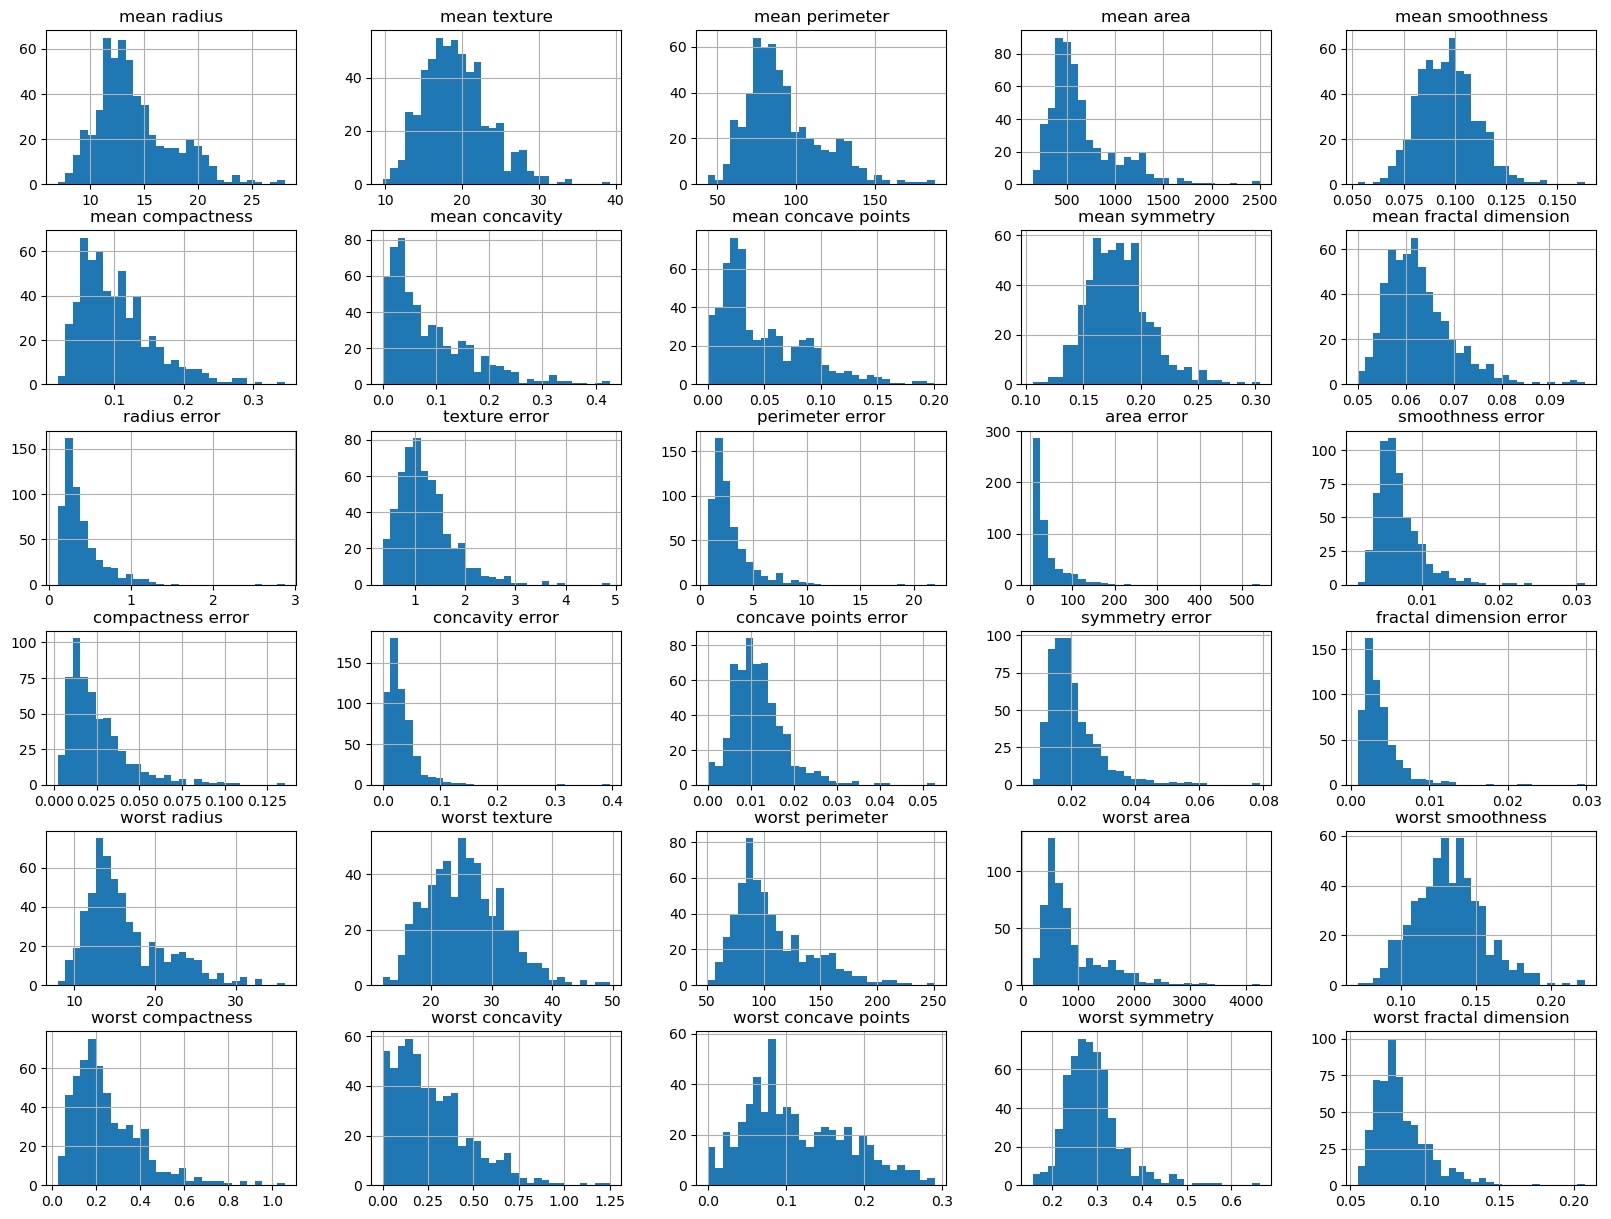

In [35]:
X.hist(bins=30, figsize=(20,15))
plt.show()

### *Traçando os gráficos de dispersão das caracteríticas*

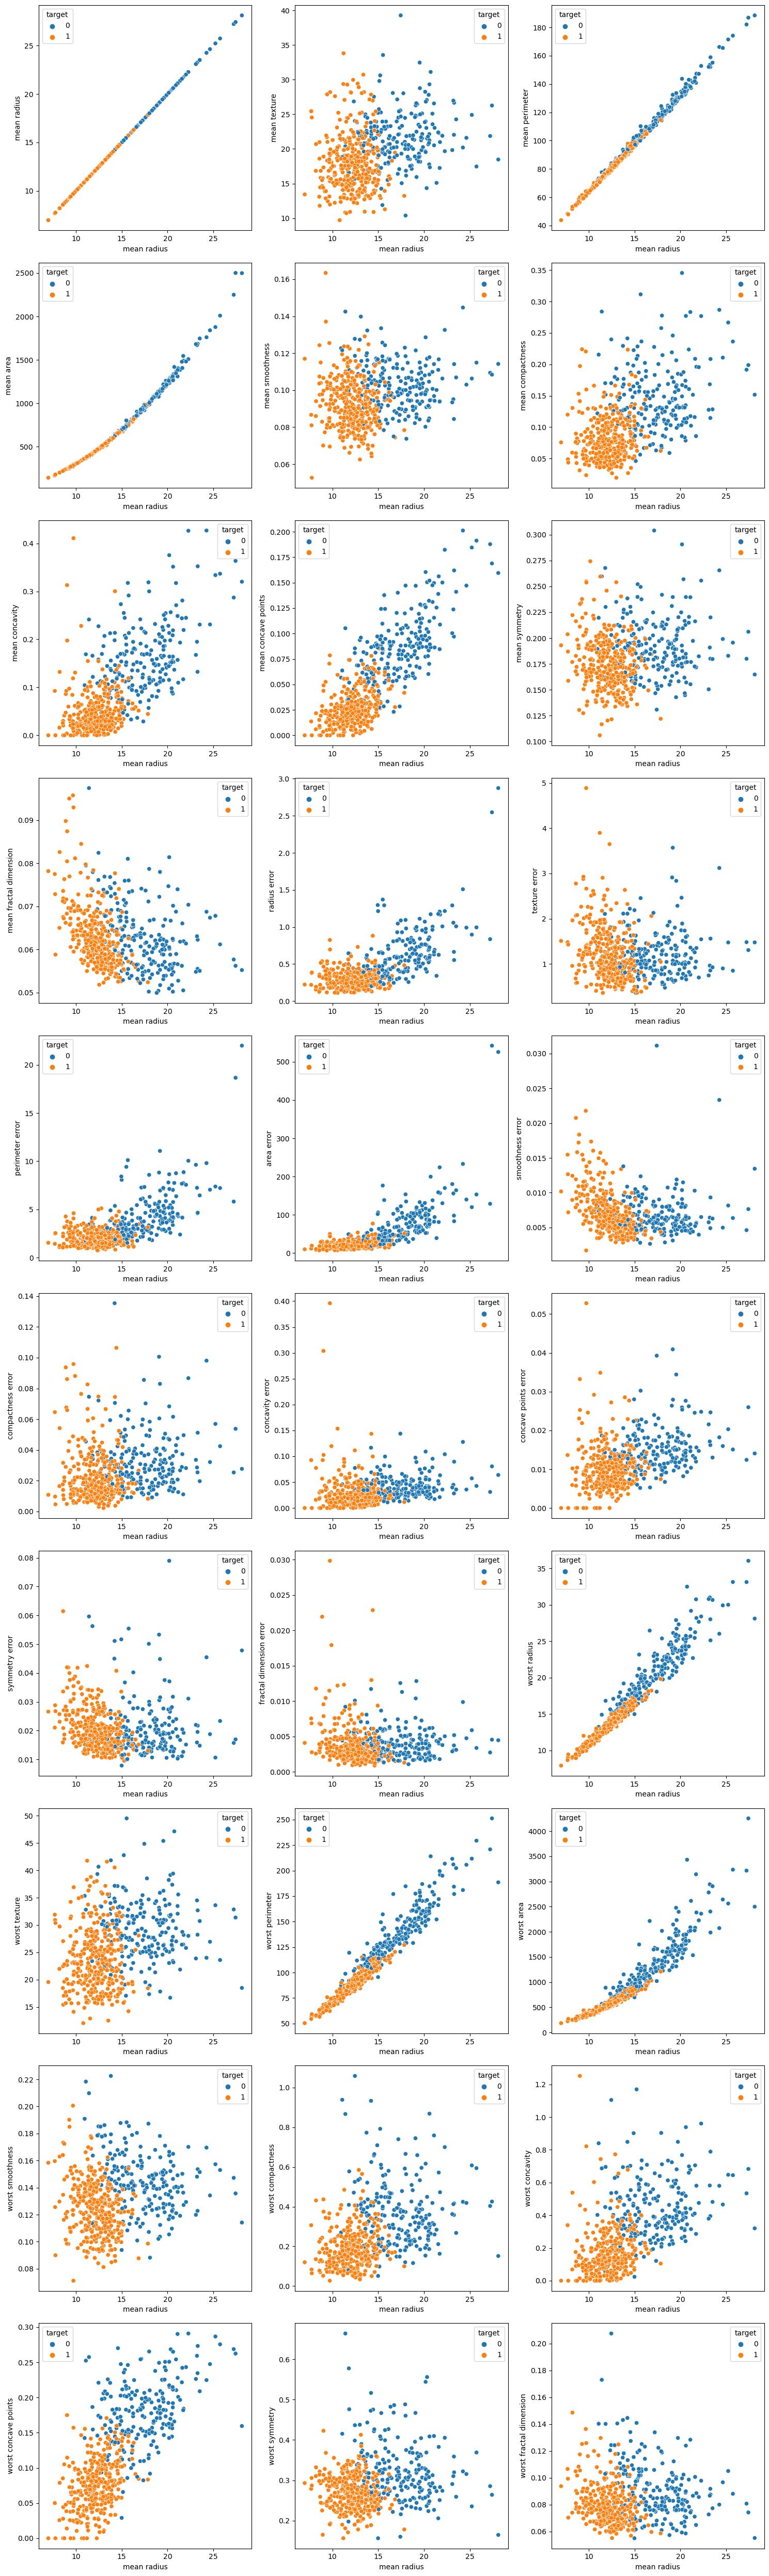

In [36]:
X_copy = X.copy()
X_copy['target'] = y

palette = sns.color_palette()[:2]
num_features = X.shape[1]  # Número de características
num_cols = 3  # Número de colunas para os subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calcular o número de linhas necessário

plt.figure(figsize=(15, 50))

# Laço para criar os gráficos de dispersão
for i, feature in enumerate(X.columns):  # Iterar por todas as colunas de X
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(x=X_copy['mean radius'], y=X_copy[feature], hue=X_copy['target'], palette=palette)
    plt.xlabel('mean radius')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### *Exibindo a contagem dos valores da coluna alvo (Target)*

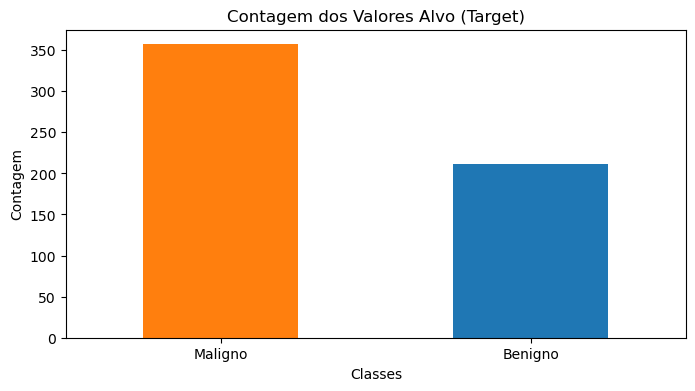

In [37]:
palette = sns.color_palette()
value_counts = y.value_counts()
plt.figure(figsize=(8, 4))

colors = [palette[1],palette[0]]  # Cores diferentes para as classes
value_counts.plot(kind='bar', color=colors)
plt.title('Contagem dos Valores Alvo (Target)')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Maligno', 'Benigno'], rotation=0)
plt.show()

In [38]:
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

### *Separar conjunto de dados de treino e teste*
Antes de explorar alguns insights sobre os dados, vamos dividi-los em conjunto de teste e conjunto de treinamento.

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=20)

print('O tamanho dos dados de treinamento é: {} \nO tamanho dos dados de teste é: {}'.format(len(X_train), len(X_test)))

O tamanho dos dados de treinamento é: 398 
O tamanho dos dados de teste é: 171


In [40]:
y_test.value_counts()

target
1    107
0     64
Name: count, dtype: int64

## 4 - Pré-processamento

<!-- The features already have small values but let's scale them to be between 0 and 1. SVM work well with scaled values. I will set up a pipeline to handle that. -->

O SVM funciona bem com valores escalonados. Aqui é feita a configuração para escalar esses valores para ficarem entre 0 e 1. 

In [41]:
X_train.max()

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2499.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  525.60000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 33.12000
worst texture                49.54000
worst perimeter             220.80000
worst area                 3432.00000
worst smoothness              0.22260
worst compactness             0.93790
worst concav

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scale_pipe = Pipeline([
    ('scaler', MinMaxScaler())
])

X_train_scaled = scale_pipe.fit_transform(X_train)
X_test_scaled = scale_pipe.transform(X_test)

In [43]:
X_train_scaled

array([[0.33125089, 0.31972318, 0.32706793, ..., 0.62783505, 0.38346401,
        0.53933305],
       [0.48364807, 0.48927336, 0.48655933, ..., 0.65257732, 0.41530055,
        0.84288157],
       [0.17128118, 0.29653979, 0.17614539, ..., 0.27237113, 0.32668092,
        0.22263788],
       ...,
       [0.20393772, 0.09204152, 0.19653099, ..., 0.30068729, 0.27750059,
        0.26913211],
       [0.18453311, 0.18131488, 0.18395412, ..., 0.2737457 , 0.2413875 ,
        0.56605387],
       [0.26404468, 0.30069204, 0.2634925 , ..., 0.31838488, 0.13209789,
        0.17999145]])

In [44]:
X_test_scaled

array([[0.17648729, 0.34636678, 0.17766568, ..., 0.29553265, 0.24708957,
        0.34170586],
       [0.40839604, 0.31141869, 0.38843204, ..., 0.29443299, 0.26562129,
        0.14162035],
       [0.55132756, 0.50968858, 0.55980927, ..., 0.63505155, 0.44642433,
        0.45724669],
       ...,
       [0.35964788, 0.38581315, 0.37053417, ..., 0.92817869, 0.64124495,
        0.77447627],
       [0.37810592, 0.22733564, 0.36231083, ..., 0.29158076, 0.19933476,
        0.09876015],
       [0.45525108, 0.61245675, 0.44578813, ..., 0.48728522, 0.15514374,
        0.24754168]])

## 5 - Classificador SVM

### Parâmetros do SVM no Scikit-learn

O Scikit-learn fornece várias opções para configurar o SVM. Alguns dos principais parâmetros são:

- `kernel`: Especifica o tipo de kernel a ser usado na função de decisão. SVM suporta kernels `linear`, `polinomial`, `rbf`, `sigmoid`,`precomputed` ou um `callable`.

- `C`: Parâmetro de regularização. um valor de `C` alto pode fazer o modelo se ajustar bem aos dados, e ter menor a margem de erro, mas corre o risco de memorizar os dados (overfitting). 

Demais parâmentros:

- `gamma`: Coeficiente do kernel para 'rbf', 'poly' e 'sigmoid'. Se `gamma` for 'scale', `gamma` será 1 / (n_features * X.var()), se for 'auto', `gamma` será 1 / n_features.


- `degree`: Grau do polinômio se o kernel for 'poly'. Ignorado por outros kernels.

- `coef0`: Término independente no kernel 'poly' e 'sigmoid'.


- `shrinking`: Se deve usar heurísticas de encolhimento.


- `probability`: Se deve habilitar estimativas de probabilidade. Isso é mais demorado e deve ser ativado antes de ajustar o modelo.

- `tol`: Critério de tolerância para parada.

- `cache_size`: Tamanho do cache em MB.

- `class_weight`: Peso associado às classes.

- `verbose`: Habilitar saída detalhada.

- `max_iter`: Número máximo de iterações.

### Treinamento do Classificador SVM 
Aqui é realizado o treinamento de dois classificadores: Linear SVC e SVC que podemos usar kernels diferentes. 


In [45]:
#Linear SVC
lin_svc = LinearSVC(dual=False)
lin_svc.fit(X_train_scaled, y_train)

#SVC (kernel = 'poly')
poly_svc = SVC(kernel='poly', C = 0.001)
poly_svc.fit(X_train_scaled, y_train)

print('Modelos treinados com sucesso!')

Modelos treinados com sucesso!


## 6 - Avaliando o classificador SVM

#### Previsões dos modelos: 

In [46]:
lin_pred = lin_svc.predict(X_train_scaled)
poly_pred = poly_svc.predict(X_train_scaled)

Primeiro vamos exibir a matriz de confusão e o relatório de classificação no LinearSVC.
O relatório de classificação vai além da exatidão, incluindo recall, precisão e pontuação f1.

#### Matriz de confusão LinearSVC

In [47]:
confusion_matrix(y_train, lin_pred)

array([[142,   6],
       [  1, 249]], dtype=int64)

#### Relatório de classificação LinearSVC

In [48]:
print(classification_report(y_train, lin_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       148
           1       0.98      1.00      0.99       250

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



#### Matriz de confusão LinearSVC

In [49]:
confusion_matrix(y_train, poly_pred)

array([[114,  34],
       [  0, 250]], dtype=int64)

#### Relatório de classificação SVC com kernel polinomial.

In [50]:
print(classification_report(y_train, poly_pred))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       148
           1       0.88      1.00      0.94       250

    accuracy                           0.91       398
   macro avg       0.94      0.89      0.90       398
weighted avg       0.92      0.91      0.91       398



Os resultados são bastante impressionantes, visto que não foi necessário que ajustar nenhum hiperparâmetro. 

Embora isso seja suficiente para nosso conjunto de dados, é improvável que seu modelo funcione bem inicialmente na vida real. 

Talvez seja necessário ajustar hiperparâmetros.

Existem duas técnicas comuns para pesquisa de hiperparâmetros. **Estes são Pesquisa Aleatória e GridSearch.**

## 7 - Funções do kernel
### Linear
Eles são comumente recomendados para classificação de texto, pois a maioria desses tipos de problemas de **classificação são linearmente separáveis.**

O kernel linear funciona muito bem quando há muitas características, e os problemas de classificação de texto têm muitas características. 

As funções lineares do kernel são mais rápidas que a maioria das outras e você tem menos parâmetros para otimizar.

### Polinomial

**Usar uma curva polinomial (tipo uma parábola).**

O kernel polinomial não é usado na prática com muita frequência porque não é tão eficiente computacionalmente quanto outros kernels e suas previsões não são tão precisas.

###  Função de base radial gaussiana (RBF)
**Usar uma função que cria bolhas ao redor dos dados.**

Esse é um dos kernels mais poderosos e comumente usados em SVMs. Ele geralmente é a escolha para dados **não lineares.**

### Sigmoide

**Usar uma função que se parece com uma curva sigmoidal (parecida com uma curva em S).**

Mais útil em **redes neurais** do que em máquinas de vetores de suporte, mas há casos de uso específicos ocasionais.

### Treinando e avaliando o SVM com diferentes kernels

In [51]:
def train_and_evaluate_svm(kernel):
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    
    print(f"Kernel: {kernel}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

In [52]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    train_and_evaluate_svm(kernel)

Kernel: linear
[[ 63   1]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.99      1.00      1.00       107

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



Kernel: poly
[[ 62   2]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Kernel: rbf
[[ 63   1]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg   

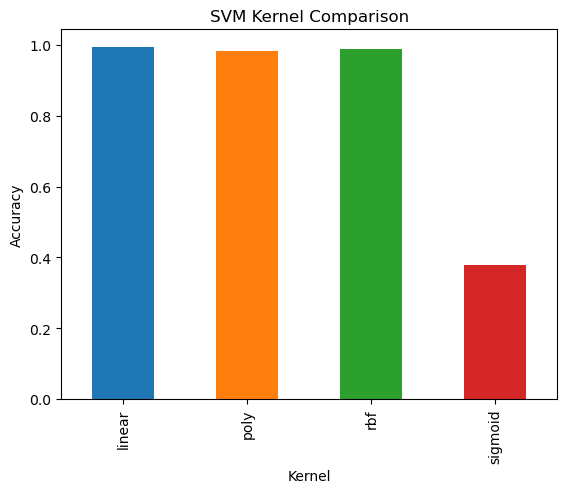

In [53]:
results = []
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    score = svm.score(X_test_scaled, y_test)
    results.append((kernel, score))

results_df = pd.DataFrame(results, columns=['Kernel', 'Accuracy'])
colors = sns.color_palette()[:4] 
results_df.plot(kind='bar', x='Kernel', y='Accuracy', legend=False, title='SVM Kernel Comparison', color=colors)
plt.ylabel('Accuracy')
plt.show()

## 8 - Melhorando o classificador de vetores de suporte

### Pesquisa de hiperparâmetros - Gridsearch

In [54]:
from sklearn.model_selection import GridSearchCV

params_grid = {'C':[0.001,10,100,1000],
              'gamma':[1,0.1,0.01,0.001],
                'degree':[2,3,4,5],
              'coef0':[0,1,2,4]

              }

grid_search = GridSearchCV(SVC(kernel='poly'), params_grid, verbose=2)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=0, degree=2, gamma=1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=0, degree=2, gamma=0.1; total time=   0.0s
[CV] END .............C=0.001, coef0=0, degree=2, gamma=0.01; total time=   0.0s
[CV] END .............C=0.001, coef0=0, degre

[CV] END .............C=0.001, coef0=1, degree=3, gamma=0.01; total time=   0.0s
[CV] END .............C=0.001, coef0=1, degree=3, gamma=0.01; total time=   0.0s
[CV] END ............C=0.001, coef0=1, degree=3, gamma=0.001; total time=   0.0s
[CV] END ............C=0.001, coef0=1, degree=3, gamma=0.001; total time=   0.0s
[CV] END ............C=0.001, coef0=1, degree=3, gamma=0.001; total time=   0.0s
[CV] END ............C=0.001, coef0=1, degree=3, gamma=0.001; total time=   0.0s
[CV] END ............C=0.001, coef0=1, degree=3, gamma=0.001; total time=   0.0s
[CV] END ................C=0.001, coef0=1, degree=4, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=1, degree=4, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=1, degree=4, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=1, degree=4, gamma=1; total time=   0.0s
[CV] END ................C=0.001, coef0=1, degree=4, gamma=1; total time=   0.0s
[CV] END ..............C=0.0

[CV] END ..............C=0.001, coef0=2, degree=5, gamma=0.1; total time=   0.0s
[CV] END ..............C=0.001, coef0=2, degree=5, gamma=0.1; total time=   0.0s
[CV] END .............C=0.001, coef0=2, degree=5, gamma=0.01; total time=   0.0s
[CV] END .............C=0.001, coef0=2, degree=5, gamma=0.01; total time=   0.0s
[CV] END .............C=0.001, coef0=2, degree=5, gamma=0.01; total time=   0.0s
[CV] END .............C=0.001, coef0=2, degree=5, gamma=0.01; total time=   0.0s
[CV] END .............C=0.001, coef0=2, degree=5, gamma=0.01; total time=   0.0s
[CV] END ............C=0.001, coef0=2, degree=5, gamma=0.001; total time=   0.0s
[CV] END ............C=0.001, coef0=2, degree=5, gamma=0.001; total time=   0.0s
[CV] END ............C=0.001, coef0=2, degree=5, gamma=0.001; total time=   0.0s
[CV] END ............C=0.001, coef0=2, degree=5, gamma=0.001; total time=   0.0s
[CV] END ............C=0.001, coef0=2, degree=5, gamma=0.001; total time=   0.0s
[CV] END ................C=0

[CV] END ...................C=10, coef0=0, degree=3, gamma=1; total time=   0.0s
[CV] END .................C=10, coef0=0, degree=3, gamma=0.1; total time=   0.0s
[CV] END .................C=10, coef0=0, degree=3, gamma=0.1; total time=   0.0s
[CV] END .................C=10, coef0=0, degree=3, gamma=0.1; total time=   0.0s
[CV] END .................C=10, coef0=0, degree=3, gamma=0.1; total time=   0.0s
[CV] END .................C=10, coef0=0, degree=3, gamma=0.1; total time=   0.0s
[CV] END ................C=10, coef0=0, degree=3, gamma=0.01; total time=   0.0s
[CV] END ................C=10, coef0=0, degree=3, gamma=0.01; total time=   0.0s
[CV] END ................C=10, coef0=0, degree=3, gamma=0.01; total time=   0.0s
[CV] END ................C=10, coef0=0, degree=3, gamma=0.01; total time=   0.0s
[CV] END ................C=10, coef0=0, degree=3, gamma=0.01; total time=   0.0s
[CV] END ...............C=10, coef0=0, degree=3, gamma=0.001; total time=   0.0s
[CV] END ...............C=10

[CV] END ...............C=10, coef0=1, degree=4, gamma=0.001; total time=   0.0s
[CV] END ...................C=10, coef0=1, degree=5, gamma=1; total time=   0.0s
[CV] END ...................C=10, coef0=1, degree=5, gamma=1; total time=   0.0s
[CV] END ...................C=10, coef0=1, degree=5, gamma=1; total time=   0.0s
[CV] END ...................C=10, coef0=1, degree=5, gamma=1; total time=   0.0s
[CV] END ...................C=10, coef0=1, degree=5, gamma=1; total time=   0.0s
[CV] END .................C=10, coef0=1, degree=5, gamma=0.1; total time=   0.0s
[CV] END .................C=10, coef0=1, degree=5, gamma=0.1; total time=   0.0s
[CV] END .................C=10, coef0=1, degree=5, gamma=0.1; total time=   0.0s
[CV] END .................C=10, coef0=1, degree=5, gamma=0.1; total time=   0.0s
[CV] END .................C=10, coef0=1, degree=5, gamma=0.1; total time=   0.0s
[CV] END ................C=10, coef0=1, degree=5, gamma=0.01; total time=   0.0s
[CV] END ................C=1

[CV] END ................C=10, coef0=4, degree=2, gamma=0.01; total time=   0.0s
[CV] END ...............C=10, coef0=4, degree=2, gamma=0.001; total time=   0.0s
[CV] END ...............C=10, coef0=4, degree=2, gamma=0.001; total time=   0.0s
[CV] END ...............C=10, coef0=4, degree=2, gamma=0.001; total time=   0.0s
[CV] END ...............C=10, coef0=4, degree=2, gamma=0.001; total time=   0.0s
[CV] END ...............C=10, coef0=4, degree=2, gamma=0.001; total time=   0.0s
[CV] END ...................C=10, coef0=4, degree=3, gamma=1; total time=   0.0s
[CV] END ...................C=10, coef0=4, degree=3, gamma=1; total time=   0.0s
[CV] END ...................C=10, coef0=4, degree=3, gamma=1; total time=   0.0s
[CV] END ...................C=10, coef0=4, degree=3, gamma=1; total time=   0.0s
[CV] END ...................C=10, coef0=4, degree=3, gamma=1; total time=   0.0s
[CV] END .................C=10, coef0=4, degree=3, gamma=0.1; total time=   0.0s
[CV] END .................C=

[CV] END ...............C=100, coef0=0, degree=4, gamma=0.01; total time=   0.0s
[CV] END ...............C=100, coef0=0, degree=4, gamma=0.01; total time=   0.0s
[CV] END ...............C=100, coef0=0, degree=4, gamma=0.01; total time=   0.0s
[CV] END ...............C=100, coef0=0, degree=4, gamma=0.01; total time=   0.0s
[CV] END ...............C=100, coef0=0, degree=4, gamma=0.01; total time=   0.0s
[CV] END ..............C=100, coef0=0, degree=4, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=0, degree=4, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=0, degree=4, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=0, degree=4, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=0, degree=4, gamma=0.001; total time=   0.0s
[CV] END ..................C=100, coef0=0, degree=5, gamma=1; total time=   0.0s
[CV] END ..................C=100, coef0=0, degree=5, gamma=1; total time=   0.0s
[CV] END ..................C

[CV] END ...............C=100, coef0=1, degree=5, gamma=0.01; total time=   0.0s
[CV] END ..............C=100, coef0=1, degree=5, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=1, degree=5, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=1, degree=5, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=1, degree=5, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=1, degree=5, gamma=0.001; total time=   0.0s
[CV] END ..................C=100, coef0=2, degree=2, gamma=1; total time=   0.0s
[CV] END ..................C=100, coef0=2, degree=2, gamma=1; total time=   0.0s
[CV] END ..................C=100, coef0=2, degree=2, gamma=1; total time=   0.0s
[CV] END ..................C=100, coef0=2, degree=2, gamma=1; total time=   0.0s
[CV] END ..................C=100, coef0=2, degree=2, gamma=1; total time=   0.0s
[CV] END ................C=100, coef0=2, degree=2, gamma=0.1; total time=   0.0s
[CV] END ................C=1

[CV] END ................C=100, coef0=4, degree=3, gamma=0.1; total time=   0.0s
[CV] END ................C=100, coef0=4, degree=3, gamma=0.1; total time=   0.0s
[CV] END ................C=100, coef0=4, degree=3, gamma=0.1; total time=   0.0s
[CV] END ...............C=100, coef0=4, degree=3, gamma=0.01; total time=   0.0s
[CV] END ...............C=100, coef0=4, degree=3, gamma=0.01; total time=   0.0s
[CV] END ...............C=100, coef0=4, degree=3, gamma=0.01; total time=   0.0s
[CV] END ...............C=100, coef0=4, degree=3, gamma=0.01; total time=   0.0s
[CV] END ...............C=100, coef0=4, degree=3, gamma=0.01; total time=   0.0s
[CV] END ..............C=100, coef0=4, degree=3, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=4, degree=3, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=4, degree=3, gamma=0.001; total time=   0.0s
[CV] END ..............C=100, coef0=4, degree=3, gamma=0.001; total time=   0.0s
[CV] END ..............C=100

[CV] END ...............C=1000, coef0=0, degree=5, gamma=0.1; total time=   0.0s
[CV] END ...............C=1000, coef0=0, degree=5, gamma=0.1; total time=   0.0s
[CV] END ...............C=1000, coef0=0, degree=5, gamma=0.1; total time=   0.0s
[CV] END ..............C=1000, coef0=0, degree=5, gamma=0.01; total time=   0.0s
[CV] END ..............C=1000, coef0=0, degree=5, gamma=0.01; total time=   0.0s
[CV] END ..............C=1000, coef0=0, degree=5, gamma=0.01; total time=   0.0s
[CV] END ..............C=1000, coef0=0, degree=5, gamma=0.01; total time=   0.0s
[CV] END ..............C=1000, coef0=0, degree=5, gamma=0.01; total time=   0.0s
[CV] END .............C=1000, coef0=0, degree=5, gamma=0.001; total time=   0.0s
[CV] END .............C=1000, coef0=0, degree=5, gamma=0.001; total time=   0.0s
[CV] END .............C=1000, coef0=0, degree=5, gamma=0.001; total time=   0.0s
[CV] END .............C=1000, coef0=0, degree=5, gamma=0.001; total time=   0.0s
[CV] END .............C=1000

[CV] END .................C=1000, coef0=2, degree=3, gamma=1; total time=   0.0s
[CV] END .................C=1000, coef0=2, degree=3, gamma=1; total time=   0.0s
[CV] END .................C=1000, coef0=2, degree=3, gamma=1; total time=   0.0s
[CV] END .................C=1000, coef0=2, degree=3, gamma=1; total time=   0.0s
[CV] END ...............C=1000, coef0=2, degree=3, gamma=0.1; total time=   0.0s
[CV] END ...............C=1000, coef0=2, degree=3, gamma=0.1; total time=   0.0s
[CV] END ...............C=1000, coef0=2, degree=3, gamma=0.1; total time=   0.0s
[CV] END ...............C=1000, coef0=2, degree=3, gamma=0.1; total time=   0.0s
[CV] END ...............C=1000, coef0=2, degree=3, gamma=0.1; total time=   0.0s
[CV] END ..............C=1000, coef0=2, degree=3, gamma=0.01; total time=   0.0s
[CV] END ..............C=1000, coef0=2, degree=3, gamma=0.01; total time=   0.0s
[CV] END ..............C=1000, coef0=2, degree=3, gamma=0.01; total time=   0.0s
[CV] END ..............C=100

[CV] END ..............C=1000, coef0=4, degree=4, gamma=0.01; total time=   0.0s
[CV] END .............C=1000, coef0=4, degree=4, gamma=0.001; total time=   0.0s
[CV] END .............C=1000, coef0=4, degree=4, gamma=0.001; total time=   0.0s
[CV] END .............C=1000, coef0=4, degree=4, gamma=0.001; total time=   0.0s
[CV] END .............C=1000, coef0=4, degree=4, gamma=0.001; total time=   0.0s
[CV] END .............C=1000, coef0=4, degree=4, gamma=0.001; total time=   0.0s
[CV] END .................C=1000, coef0=4, degree=5, gamma=1; total time=   0.0s
[CV] END .................C=1000, coef0=4, degree=5, gamma=1; total time=   0.0s
[CV] END .................C=1000, coef0=4, degree=5, gamma=1; total time=   0.0s
[CV] END .................C=1000, coef0=4, degree=5, gamma=1; total time=   0.0s
[CV] END .................C=1000, coef0=4, degree=5, gamma=1; total time=   0.0s
[CV] END ...............C=1000, coef0=4, degree=5, gamma=0.1; total time=   0.0s
[CV] END ...............C=10

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 10, 100, 1000], 'coef0': [0, 1, 2, 4],
                         'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

### Melhores Parâmetros

In [55]:
grid_search.best_params_

{'C': 100, 'coef0': 1, 'degree': 2, 'gamma': 0.01}

### Treinando o melhor modelo encontrado pelo grid search com os dados de treinamento escalados

In [56]:
poly_best = grid_search.best_estimator_.fit(X_train_scaled, y_train)

### Previsões do Modelo

In [57]:
grid_pred = poly_best.predict(X_train_scaled)

In [58]:
confusion_matrix(y_train, grid_pred)

array([[140,   8],
       [  2, 248]], dtype=int64)

In [59]:
print(classification_report(y_train, grid_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       148
           1       0.97      0.99      0.98       250

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.97      0.97       398



### Conclusões

Esta apresntação tratou do uso de máquinas de vetores de suporte para **tarefas de classificação.**

Como você pode ver, SVM é um algoritmo robusto, dada a forma como suporta diferentes kernels.

Esses kernels são o que o tornam adequado para problemas lineares e não lineares.

No mundo real, muitos conjuntos de dados não são lineares.

Portanto, quando você não conseguir bons resultados com modelos lineares, SVM é uma boa alternativa.

### Referências:

IZBICKI, Rafael; DOS SANTOS, Tiago Mendonça. Aprendizado de máquina: uma abordagem estatística. Rafael Izbicki, 2020.

TAULLI, Tom. Introdução à Inteligência Artificial: Uma abordagem não técnica. Novatec Editora, 2020.